# Tutorial 2 - Dynamic Time Warping Intermediate Signal Approach (DTW-ISA)

**Dynamic Time Warping Intermediate Signal Approach (DTW-ISA)** is a method designed to mitigate cycle-skipping in Full-Waveform Inversion (FWI). This approach generates intermediate signals between the modelled and observed (true) signals, positioning them sufficiently close to the modelled signals to serve as temporary targets. These intermediate signals enable the inversion to progress incrementally, guiding the solution gradually toward the observed data mitigating cycle-skipping.

The method is detailed in the paper **Full-Waveform Inversion Cycle-Skipping Mitigation with Dynamic Time Warping, Part 2: An Intermediate Signal Approach** (reference to be provided soon). We strongly recommend reading the paper for a comprehensive understanding of the method before proceeding with this tutorial.

In this tutorial, we do not aim to perform seismic data modelling or inversion. The objective is only to show you how to generate intermediate signals with the DTW-ISA code and make it easy for you to adapt the code for the FWI framework of your choice, helping you apply the method to achieve your specific inversion objectives.

The data used in this tutorial are the same as that presented in **Tutorial 1 - Dynamic Time Warping Proximity Analysis (DTW-PA)**.

## Imports

First, we need to import the external and internal modules.

In [1]:
# =======================================================================
# Imports
# =======================================================================
import numpy as np
from dtaidistance import dtw, dtw_visualisation
# =======================================================================

# =======================================================================
# Our Imports
# =======================================================================
from modules.utils import src_cs_dt, get_windows
from modules.utils import sgs_dtw_best_paths_and_distances
from modules.utils import is_pi, is_mtli
from modules.plots import plot_signal, plot_signals
# =======================================================================

## Source, seismograms and time step

See **Tutorial 1 - Dynamic Time Warping Proximity Analysis (DTW-PA)** for more details.

In the figure below, image (a) shows the target P-wave velocity model, while image (b) displays the initial model. The 33 red stars mark the source positions, and the 65 yellow triangles indicate the receiver locations.

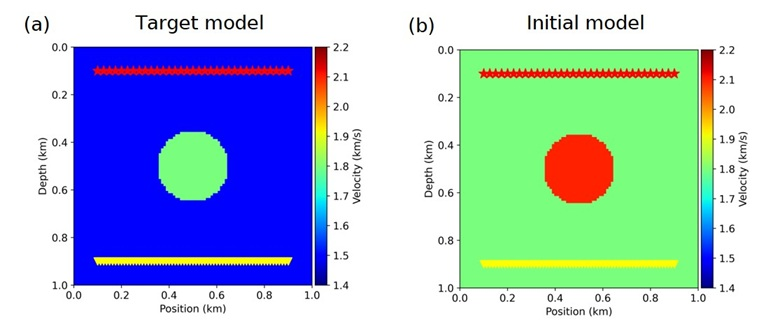

In [2]:
source = np.load(
    'data_example/source_bpf_lpf_5Hz.npy')
seismograms_initial = np.load(
    'data_example/seismogram_initial_bpf_lpf_5Hz.npy')
seismograms_true = np.load(
    'data_example/seismogram_true_bpf_lpf_5Hz.npy')

dt = 2.293  # Time step in [ms]

print(
    f'Seismogram shape is: {seismograms_true.shape},'
    'that is (number of shots, number of receivers, data).')
print(
    f'Source shape is: {source.shape},'
    'that is, only the source wavelet.')

print(f'The time step is: {dt} ms,')

Seismogram shape is: (33, 65, 1092),that is (number of shots, number of receivers, data).
Source shape is: (1092,),that is, only the source wavelet.
The time step is: 2.293 ms,


# Shot and receiver number

In the following examples, we present the data from the **shot number 0 (the first shot)** and **receiver number 0 (the first receiver)**. Of course, you can change it if you want.

In [3]:
shot_number = 0
receiver_number = 64
receiver_number_list = [0, 16, 64]

## Critical distance ($\Delta t_{cs}$) to mitigate cycle-skipping

See **Tutorial 1 - Dynamic Time Warping Proximity Analysis (DTW-PA)** for more details.

In [4]:
dt_cs, objective_function, min_index, max_index = \
    src_cs_dt(src=source, dt=dt)
# dt_cs = abs(min_index-max_index)*dt

## Analysis windows

See **Tutorial 1 - Dynamic Time Warping Proximity Analysis (DTW-PA)** for more details.

In [5]:
win_cutoff_amp = 0.001
win_ppet = 20

windows = get_windows(
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    cutoff_amp=win_cutoff_amp,
    ppet=win_ppet)

## Dynamic Time Warping (DTW) optimal path

See **Tutorial 1 - Dynamic Time Warping Proximity Analysis (DTW-PA)** for more details.

In [6]:
dtw_best_paths, dtw_short_best_paths, dtw_distances, sgs_distance = \
    sgs_dtw_best_paths_and_distances(
        seismograms_target=seismograms_true,
        seismograms_curr=seismograms_initial,
        windows=windows)

## Dynamic Time Warping Intermediate Signal Approach (DTW-ISA)

To perform the DTW-ISA, we developed two interpolation strategies for generating the intermediate signals:

- Proportional Interpolation (PI): accessible via the `is_pi` function.
- Maximum Time Lag Interpolation (MTLI): accessible via the `is_mtli` function.

Details regarding the outputs of each function can be found in their respective documentation.

In each function, you can specify the percentage of $\Delta t_{cs}$ (`dt_cs_percent`) to be used during interpolation. By default, this is set to 90%. The intermediate (interpolated) signal can optionally be smoothed using a Savitzky–Golay filter (`smooth`). To enable this, you must provide the Nyquist frequency (`f_nyquist`), typically matching the frequency of the low-pass filter used in the multiscale inversion step. By default, `smooth` is set to False.

In [7]:
dt_cs_percent = 80
smooth = True
f_nyquist = 5

### Proportional Interpolation (PI)

In [8]:
seismograms_interpolated, sgs_interpolated_are_sgs_obs, dtw_best_paths, dtw_distances, sgs_distance = is_pi(
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    dt=dt,
    dt_cs=dt_cs,
    dt_cs_percent=dt_cs_percent,
    smooth=smooth,
    f_nyquist=f_nyquist,
    windows=windows)

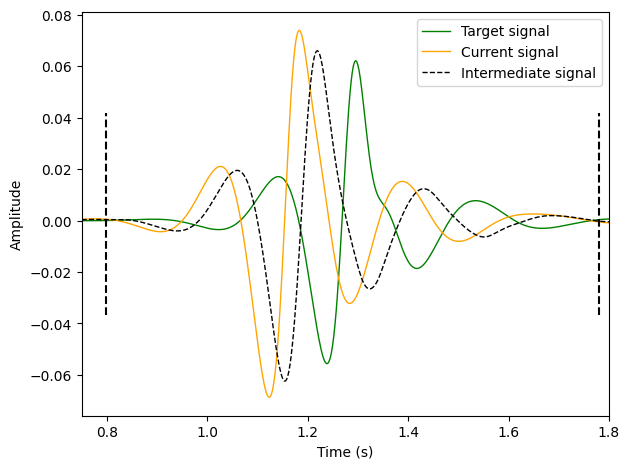

In [9]:
plot_signal(
    shot_num=shot_number,
    rec_num=receiver_number,
    dt=dt,
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    seismograms_inter=seismograms_interpolated,
    windows=windows,
    xlimit=(0.75, 1.80))

# The vertical dashed lines are the boundaries of the window

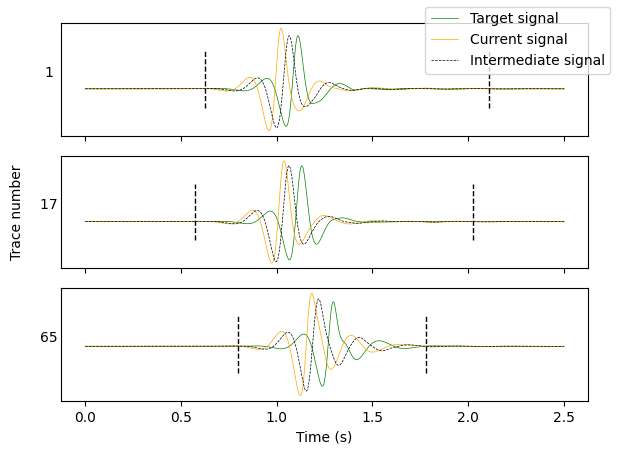

In [10]:
plot_signals(
    shot_num=shot_number,
    dt=dt,
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    rec_num_list=receiver_number_list,
    seismograms_inter=seismograms_interpolated,
    windows=windows)

# The vertical dashed lines are the boundaries of the window

### Maximum Time Lag Interpolation (MTLI)

In [11]:
seismograms_interpolated, sgs_interpolated_are_sgs_obs, dtw_best_paths, dtw_distances, sgs_distance = is_mtli(
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    dt=dt,
    dt_cs=dt_cs,
    dt_cs_percent=dt_cs_percent,
    smooth=smooth,
    f_nyquist=f_nyquist,
    windows=windows)

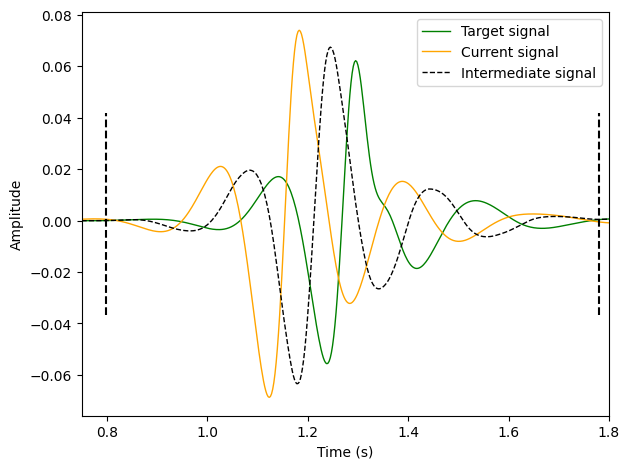

In [12]:
plot_signal(
    shot_num=shot_number,
    rec_num=receiver_number,
    dt=dt,
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    seismograms_inter=seismograms_interpolated,
    windows=windows,
    xlimit=(0.75, 1.80))

# The vertical dashed lines are the boundaries of the window

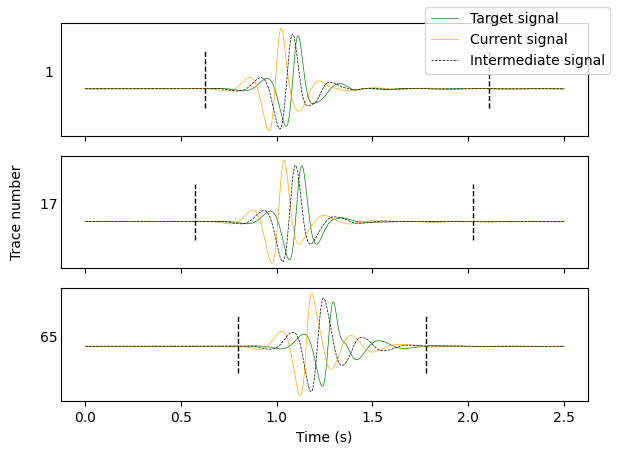

In [13]:
plot_signals(
    shot_num=shot_number,
    dt=dt,
    seismograms_target=seismograms_true,
    seismograms_curr=seismograms_initial,
    rec_num_list=receiver_number_list,
    seismograms_inter=seismograms_interpolated,
    windows=windows)

# The vertical dashed lines are the boundaries of the window

## DTW accumulated cost matrix

The [DTAIDistance](https://pypi.org/project/dtaidistance) library can be used to visualize the DTW accumulated cost matrix. This library is also integrated into our code to compute the DTW optimal paths efficiently.

In [14]:
signal_initial = seismograms_initial[shot_number][receiver_number]
signal_true = seismograms_true[shot_number][receiver_number]
filename = "accumulated_cost_matrix.jpg"

accumulated_cost_matrix = dtw.warping_paths_fast(signal_initial, signal_true)[1]
dtw_visualisation.plot_warpingpaths(
    signal_initial, signal_true,
    accumulated_cost_matrix,
    dtw_best_paths[shot_number][receiver_number],
    filename=filename)

D:\OneDrive\Documentos\Git\pessoal\dtw-pa-isa\teste\lib\site-packages\dtaidistance\dtw_visualisation.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(filename)
D:\OneDrive\Documentos\Git\pessoal\dtw-pa-isa\teste\lib\site-packages\dtaidistance\dtw_visualisation.py:349: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(filename)


(None, None)

## License

This project is licensed under the GNU General Public License v3.0 - see the [LICENSE](./LICENSE) file for more details.